The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [301]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [302]:
import os
print(os.getcwd())


/work/files/workspace


In [303]:
# read in the data

nobel = pd.read_csv('/work/files/workspace/data/nobel.csv')

nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [304]:
#check the head

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## What is the most commonly awarded **gender** and **birth country**?

A: Top gender is Male, while top birth country is the US.

In [305]:
top_gender = nobel['sex'].value_counts().idxmax()

top_gender



'Male'

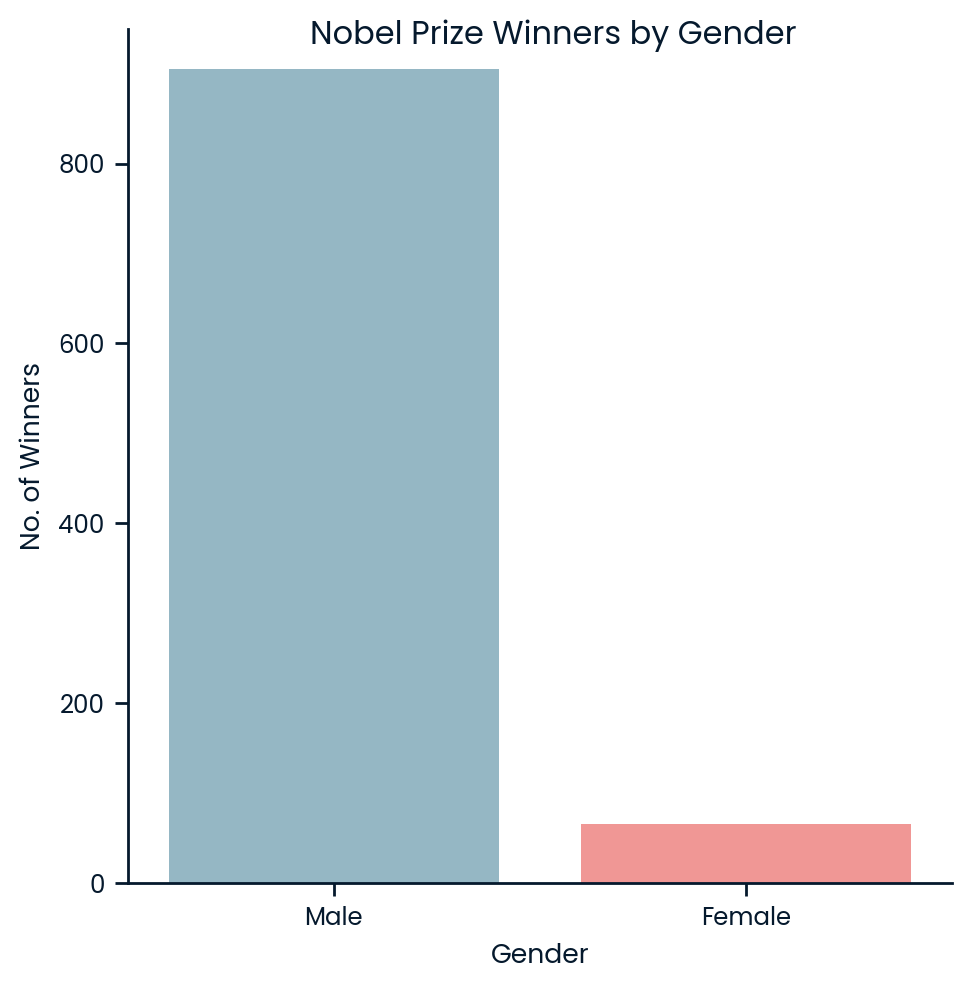

In [306]:
#viz

gender_counts = nobel['sex'].value_counts()

#convert to df

gender_df = gender_counts.reset_index()

gender_df.columns= ['Gender', 'No. of Winners']



#plotting
palette = {'Male': '#8DBBCC', 'Female': '#FF8886'} 
g= sns.catplot(x='Gender', y='No. of Winners', data=gender_df, kind='bar', palette=palette)
g._legend.remove() 
g.fig.suptitle('Nobel Prize Winners by Gender')


plt.show()

In [307]:
top_country = nobel['birth_country'].value_counts().idxmax()

top_country

'United States of America'

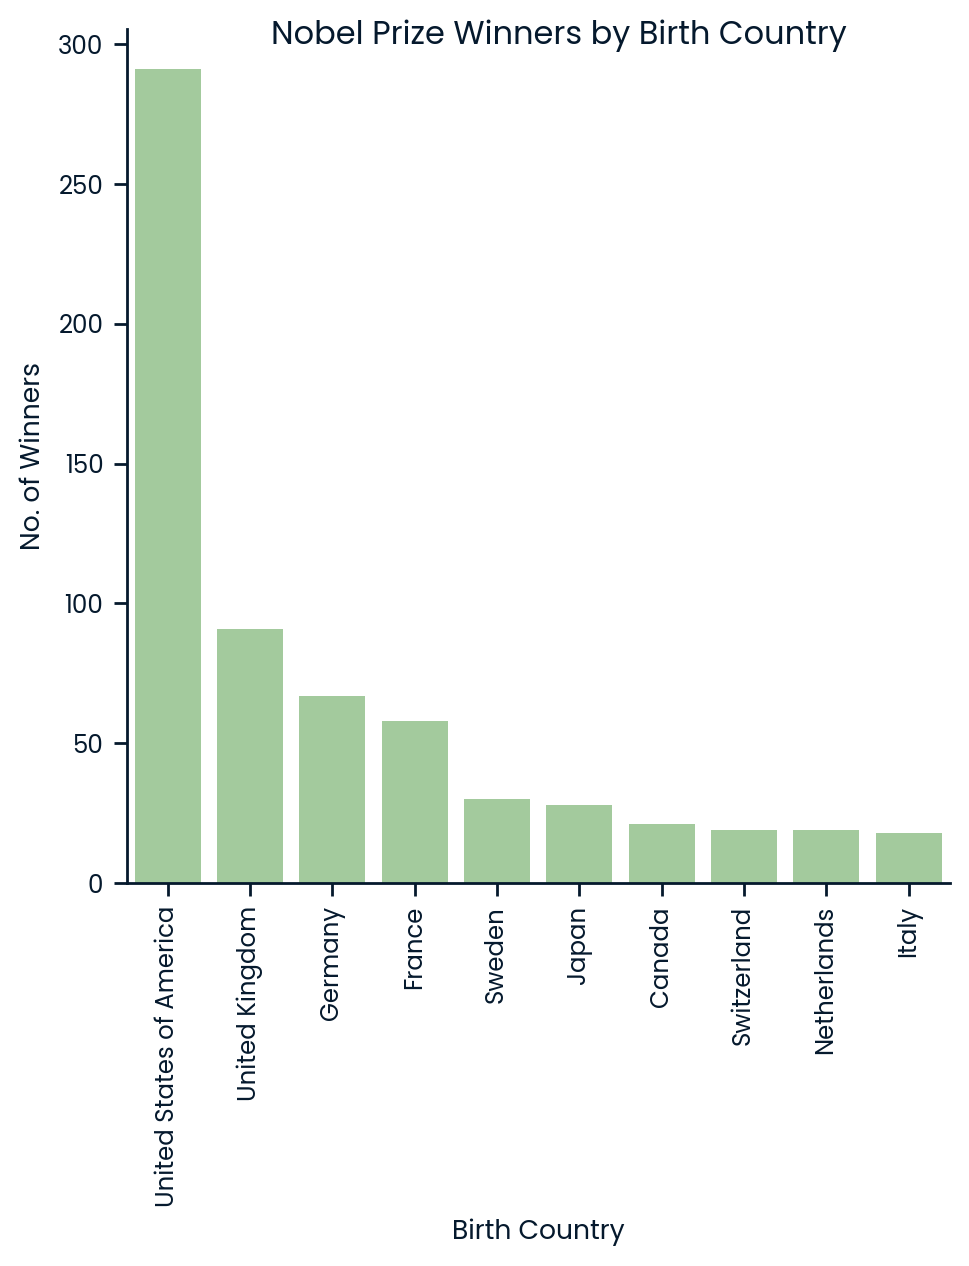

In [308]:
#viz

country_counts = nobel['birth_country'].value_counts()

#convert to df

country_df = country_counts.nlargest(10).reset_index()

country_df.columns= ['Birth Country', 'No. of Winners']



#plotting
g= sns.catplot(x='Birth Country', y='No. of Winners', data=country_df, kind='bar', hue='Birth Country', palette=['#9dd295'])
g.fig.suptitle('Nobel Prize Winners by Birth Country')
g._legend.remove()

plt.xticks(rotation=90)


plt.show()

## Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

A: 2000, with 42% US-born winners.



In [309]:
#create a decade column

nobel['decade'] = (nobel['year']//10)*10

nobel['decade'].unique()

array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
       2010, 2020])

In [310]:
#filter to US
us_nobel = nobel[nobel['birth_country'] == 'United States of America']


#Number of total winners per decade
per_decade = nobel.groupby('decade')['prize'].count()

#We'll now get the number of US-born winners per decade

us_per_decade = us_nobel.groupby('decade')['prize'].count()



In [311]:
# Getting the ratio

US_ratio = round(us_per_decade/per_decade, 2)

US_ratio.sort_values(ascending=False)

decade
2000    0.42
1990    0.40
2020    0.36
1970    0.32
1980    0.32
2010    0.31
1940    0.30
1950    0.29
1960    0.27
1930    0.25
1910    0.08
1920    0.07
1900    0.02
Name: prize, dtype: float64

In [312]:
#decade with the highest ratio

max_decade_usa = US_ratio.idxmax()

max_decade_usa

2000

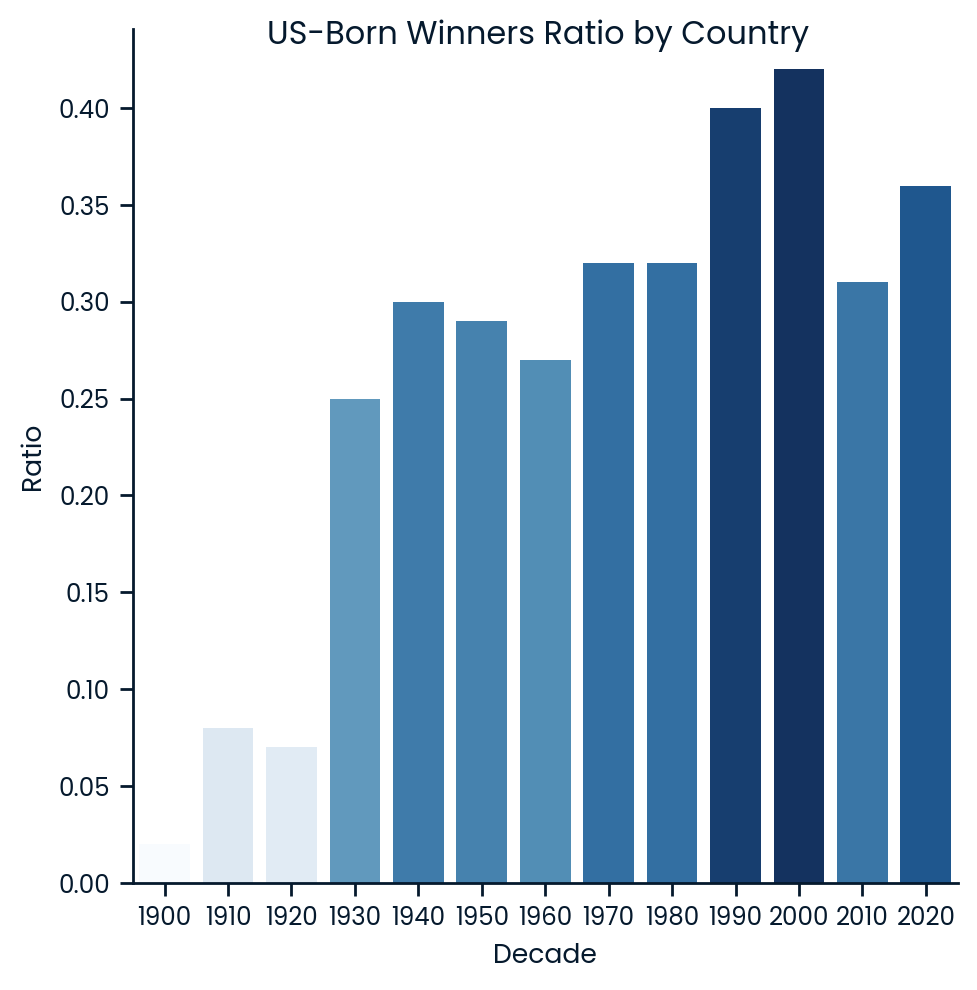

In [313]:
# convert to df
US_ratio_df = US_ratio.reset_index()  # Call the reset_index method

#rename columns
US_ratio_df.columns = ['Decade', 'Ratio']

#plotting
g = sns.catplot(x='Decade', y='Ratio', data=US_ratio_df, kind='bar', hue='Ratio', palette='Blues')
g._legend.remove()
g.fig.suptitle('US-Born Winners Ratio by Country')

plt.show()

## Which decade and Nobel Prize category combination had the highest proportion of female laureates?

A: 2020, Literature at 0.5 ratio

In [314]:
#filter to women

female_nob = nobel[nobel['sex'] == 'Female']

#group by decade and category

decade_cat = nobel.groupby(['decade', 'category'])['prize'].count()

#count of women grouped by decade and category

fem_decade_cat = female_nob.groupby(['decade', 'category'])['prize'].count()


In [315]:
#Compute for the ratio

female_ratio = round(fem_decade_cat/decade_cat, 2)

female_ratio.dropna(inplace=True)
female_ratio.sort_values(ascending=False)

decade  category  
2020    Literature    0.50
2010    Peace         0.36
2000    Literature    0.30
1990    Literature    0.30
2010    Literature    0.30
2020    Chemistry     0.30
        Peace         0.29
1970    Peace         0.23
1920    Literature    0.20
1990    Peace         0.18
2020    Physics       0.17
1940    Literature    0.17
2000    Medicine      0.15
        Peace         0.14
1940    Peace         0.14
1980    Medicine      0.13
2020    Medicine      0.12
1910    Chemistry     0.12
2020    Economics     0.11
1930    Peace         0.11
        Literature    0.11
1900    Literature    0.10
1980    Peace         0.09
1960    Literature    0.09
2010    Medicine      0.08
1930    Chemistry     0.08
1900    Physics       0.08
        Peace         0.07
1960    Chemistry     0.07
1940    Medicine      0.07
1960    Physics       0.06
2000    Economics     0.05
2010    Economics     0.05
1990    Medicine      0.05
2000    Chemistry     0.04
2010    Chemistry     0.04
1970    M

In [316]:
#Create a dictionary! :D

max_female_dict ={
       2020:'Literature'
}

max_female_dict

{2020: 'Literature'}

## Who was the first woman to receive a Nobel Prize, and in what category?



In [317]:
first_woman = female_nob[['year', 'full_name', 'laureate_id', 'category']]
first_woman

,year,full_name,laureate_id,category
19,1903,"Marie Curie, née Sklodowska",6,Physics
29,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",468,Peace
51,1909,Selma Ottilia Lovisa Lagerlöf,579,Literature
62,1911,"Marie Curie, née Sklodowska",6,Chemistry
128,1926,Grazia Deledda,597,Literature
...,...,...,...,...
982,2022,Annie Ernaux,1017,Literature
989,2023,Katalin Karikó,1024,Medicine
993,2023,Anne L’Huillier,1028,Physics
998,2023,Narges Mohammadi,1033,Peace


In [318]:
#get the traits of the first woman first, lowest year and lowest laureate id

traits = first_woman[(first_woman['laureate_id'] == first_woman['laureate_id'].min()) & (first_woman['year'] == first_woman['year'].min())]

#Name

first_woman_name = traits['full_name'].iloc[0] #adding iloc to make the output a string

#category
first_woman_category = traits['category'].iloc[0]




## Which individuals or organizations have won more than one Nobel Prize throughout the years?
A:
1.    Marie Curie, née Sklodowska
2.    Comité international de la Croix Rouge (International Committee of the Red Cross)
3.    Linus Carl Pauling
4.    Office of the United Nations High Commissioner for Refugees (UNHCR)
5.    John Bardeen
6.    Frederick Sanger

In [321]:
#get repeating names

names = nobel['full_name'].value_counts()

#filtering the ones that appear more than once 
duplicates = names[names > 1].index

#show repeating winners by filtering to duplicates

duplicate_rows = nobel[nobel['full_name'].isin(duplicates)]

repeat_list = duplicate_rows['full_name'].unique().tolist()
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Frederick Sanger']

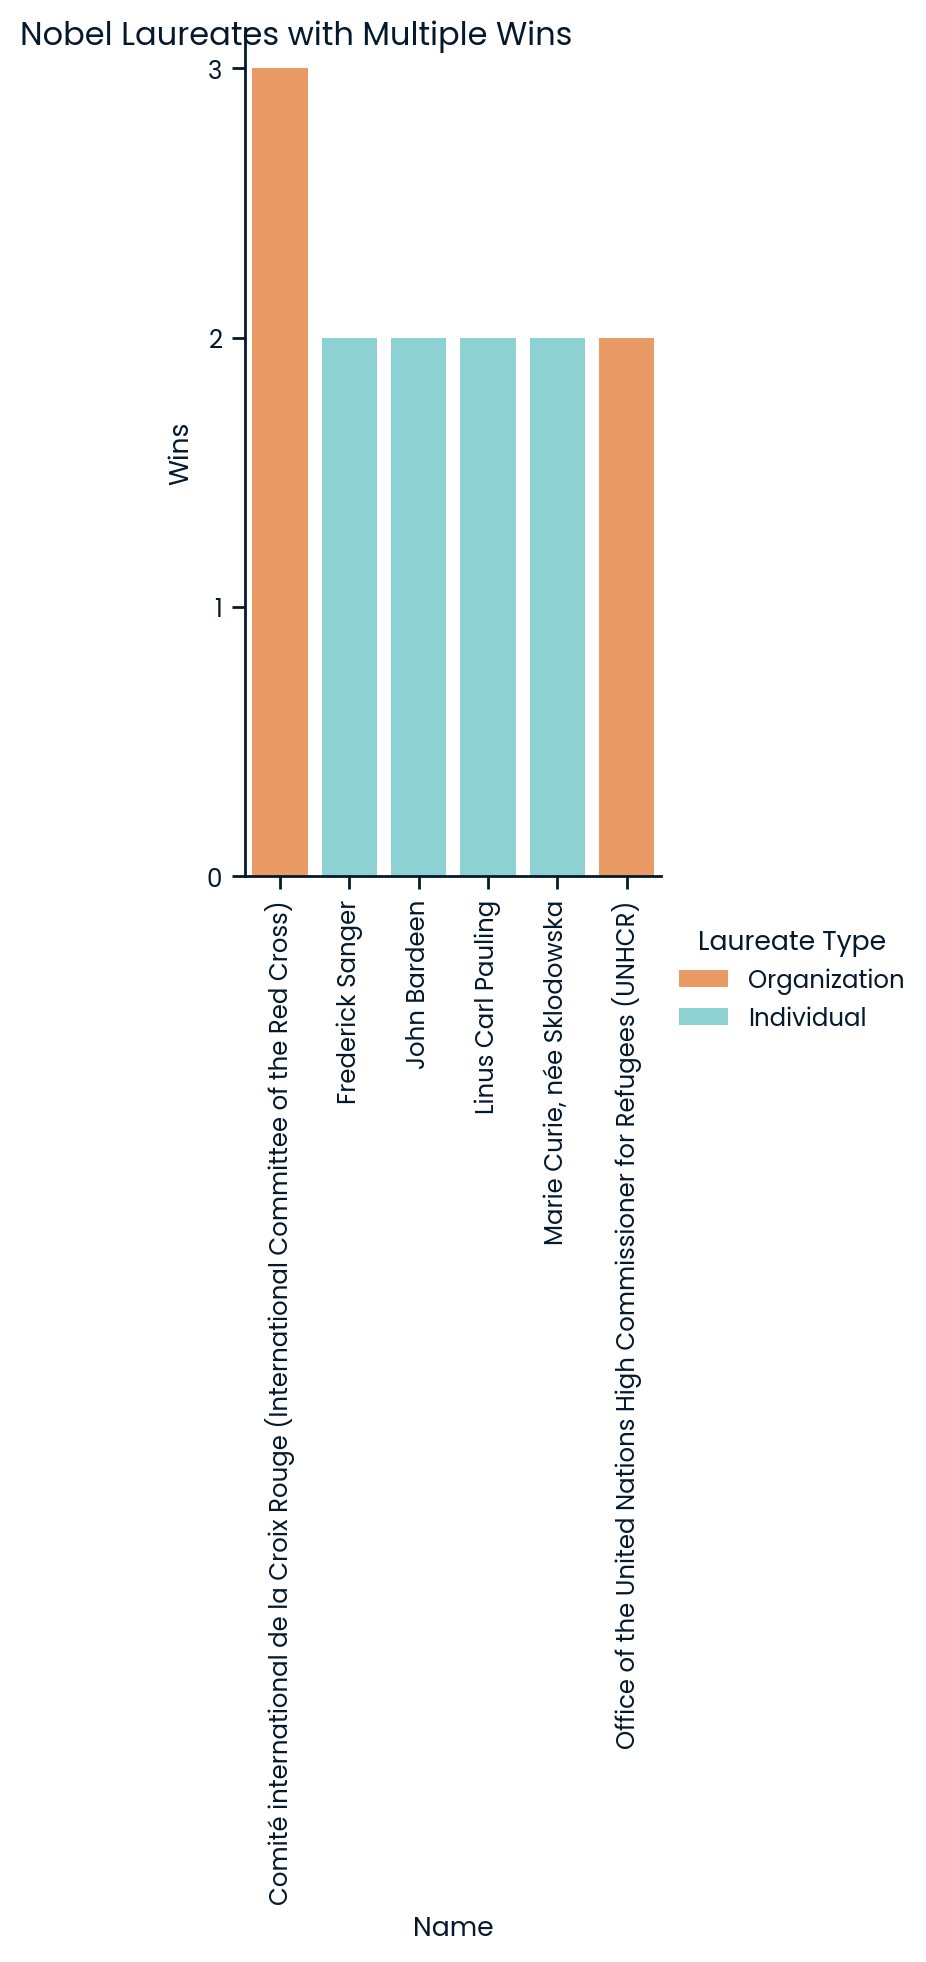

In [337]:
#viz

from matplotlib.ticker import MaxNLocator

duplicate_rows = nobel[nobel['full_name'].isin(duplicates)]


wins_count = duplicate_rows.groupby(['full_name', 'laureate_type']).size()

#convert to df
wins_count_df = wins_count.reset_index(name='Wins')

#rename cols
wins_count_df.columns = ['Name', 'Laureate Type', 'Wins']


# plotting
palette = {'Organization':'#ff964f', 'Individual':'#83dcdd'}
g = sns.catplot(x='Name', y='Wins', hue='Laureate Type', data=wins_count_df, kind='bar', palette=palette)

g.fig.suptitle('Nobel Laureates with Multiple Wins')
plt.xticks(rotation=90)

#whole number y axis

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


plt.show()